### Imports

In [83]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


### Load Data

In [84]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [85]:
print("Shape of:")
print("- Training-set:\t\t{}".format(data.train.labels.shape))
print("- Test-set:\t\t{}".format(data.test.labels.shape))
print("- Validation-set:\t{}".format(data.validation.labels.shape))

Shape of:
- Training-set:		(55000, 10)
- Test-set:		(10000, 10)
- Validation-set:	(5000, 10)


### One-Hot Encoding

In [86]:
data.test.labels[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [87]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])
data.test.cls[:5]

array([7, 2, 1, 0, 4])

### Data Dimensions

In [88]:
img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)
num_classes = 10

### Helper function for plotting images

In [89]:
def plot_images(images, generated_images=None):
    assert len(images) == 5
    
    # Create figure with 3x3 subplots
    if generated_images is None:
        fig, axes = plt.subplots(1, 5)
    else:
        fig, axes = plt.subplots(2, 5)
    
    for i, ax in enumerate(axes.flat):
        if i < 5:
            ax.imshow(images[i].reshape(img_shape), cmap='gray')
        else:
            if generated_images is None:
                break
            ax.imshow(generated_images[i - 5].reshape(img_shape), cmap='gray')
            
        ax.set_xticks([])
        ax.set_yticks([])

### Plot a few images to see if data is correct

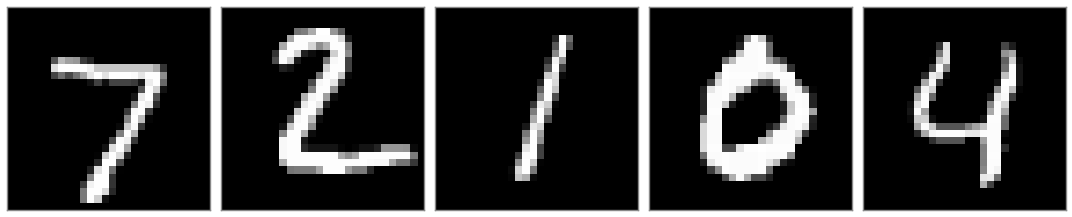

In [90]:
plot_images(data.test.images[:5])

### Define Computational Graph

#### Helper function for adding layer

In [91]:
def add_layer(_input_layer, num_neurons, use_relu=True):
    # Assume _input_layer is of shape (None, prev_neurons)
    prev_neurons = _input_layer.shape[1]

    weights = tf.Variable(np.float32(np.random.randn(prev_neurons, num_neurons) * 1e-3))
    biases = tf.Variable(tf.zeros((num_neurons)))
    
    layer = tf.matmul(_input_layer, weights) + biases
    
    if use_relu:
        layer = tf.nn.relu(layer)
        
    return layer, weights, biases

#### Placeholders

In [92]:
batch_size = 100

In [93]:
x = tf.placeholder(tf.float32, shape=(None, num_classes))
y_true = tf.placeholder(tf.float32, shape=(None, img_size_flat))

In [94]:
#from tensorflow.contrib.image import rotate
#rotation_angles = (np.random.rand(batch_size) * 2 - 1) * 20
        
#x = rotate(tf.reshape(x, (-1, img_size, img_size, 1)), rotation_angles)
#x = tf.reshape(x, (-1, img_size_flat))

#### Model

In [95]:
layer_1, weights, biases = add_layer(x, 25)
logits, _, _ = add_layer(layer_1, img_size_flat)

In [96]:
y_pred = logits

#### Cost function to be optimized

In [97]:
error = (y_pred - y_true)**2
loss = tf.reduce_mean(error)

#### Optimization Method

In [98]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.05).minimize(loss)

### Tensorflow Run

#### Create Tensorflow Session

In [18]:
session = tf.Session()

#### Initialize Variables

In [99]:
session.run(tf.global_variables_initializer())

#### Helper Function to perform optimization iterations

In [100]:
def plot_performance():
    image_idx = np.random.randint(0, data.test.num_examples, 5)
    original_images = data.test.images[image_idx]
    generated_images = session.run(y_pred, {x: data.test.labels[image_idx], y_true: data.test.images[image_idx]})
    plot_images(original_images, generated_images)

In [101]:
def optimize(num_iterations=1):
    plot_performance()
    
    for i in range(num_iterations):
        # Get a batch of training examples
        y_true_batch, x_batch = data.train.next_batch(batch_size)
        
        y_true_batch_cls = np.array([label.argmax() for label in y_true_batch])
        # Create feed-dict to send it to the graph run
        feed_dict_train = {x: x_batch, y_true: y_true_batch}
        
        # Run the optimizer
        session.run(optimizer, feed_dict_train)
        
        if i % int(55000 / batch_size) == 0:
            plot_performance()
            cost = session.run(loss, feed_dict_train)
            print("Epoch: {}, loss=".format(int(i / int(55000 / batch_size)) + 1, cost))

Epoch: 1, loss=
Epoch: 2, loss=
Epoch: 3, loss=
Epoch: 4, loss=
Epoch: 5, loss=
Epoch: 6, loss=
Epoch: 7, loss=
Epoch: 8, loss=
Epoch: 9, loss=
Epoch: 10, loss=
Epoch: 11, loss=
Epoch: 12, loss=
Epoch: 13, loss=
Epoch: 14, loss=
Epoch: 15, loss=
Epoch: 16, loss=
Epoch: 17, loss=
Epoch: 18, loss=
Epoch: 19, loss=


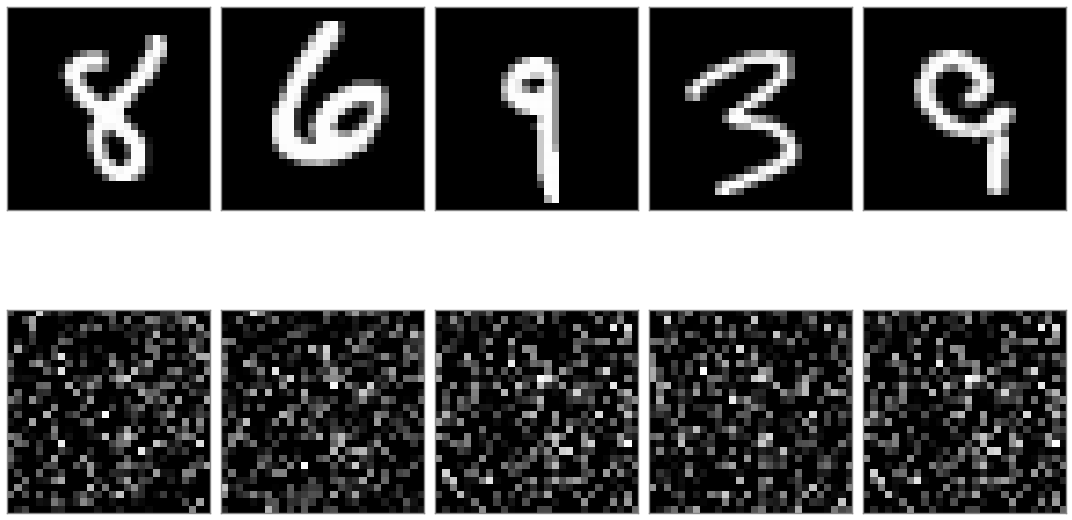

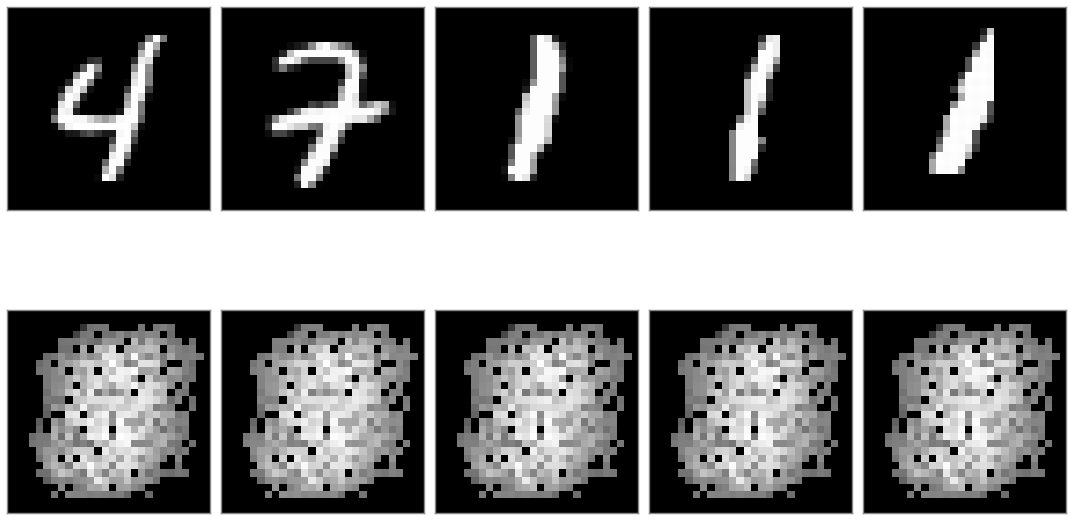

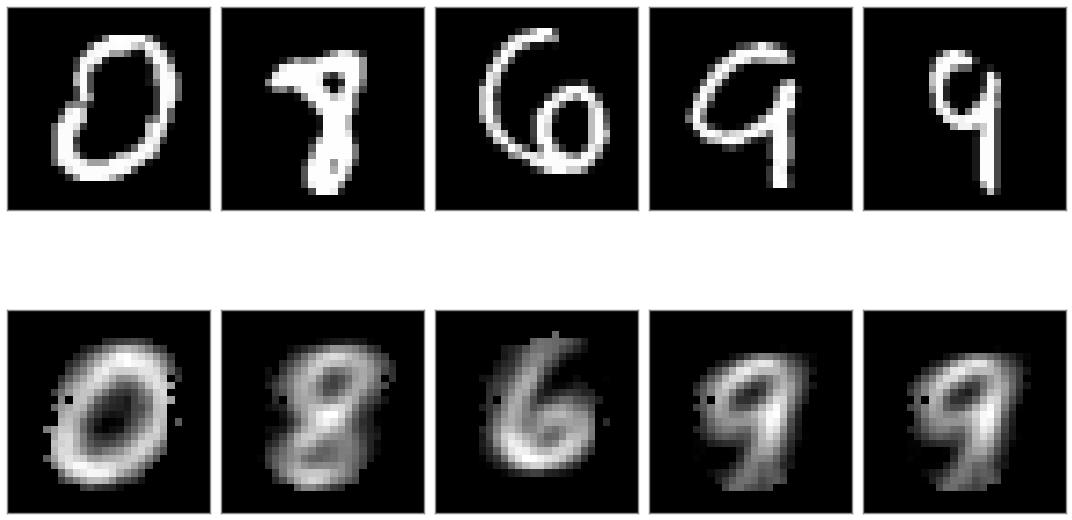

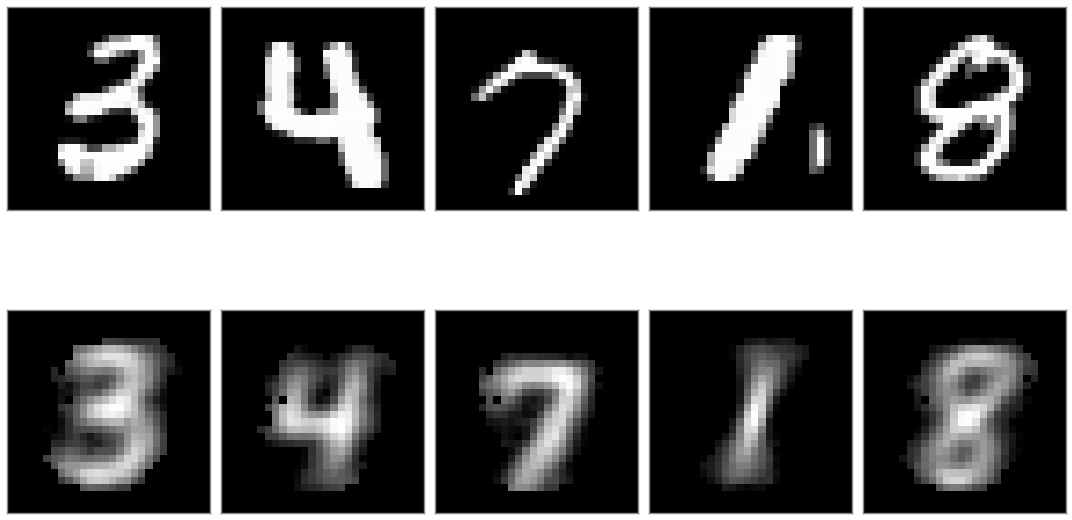

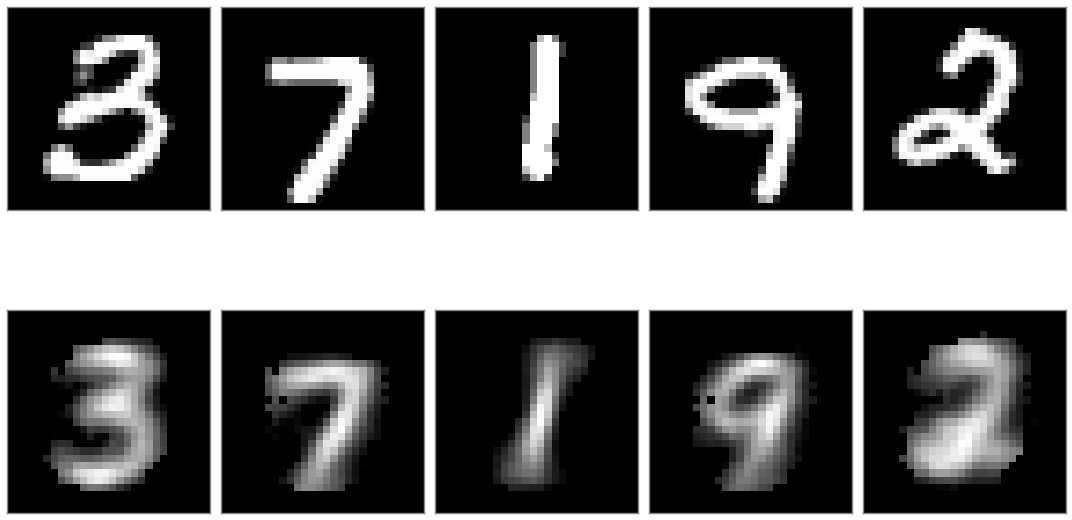

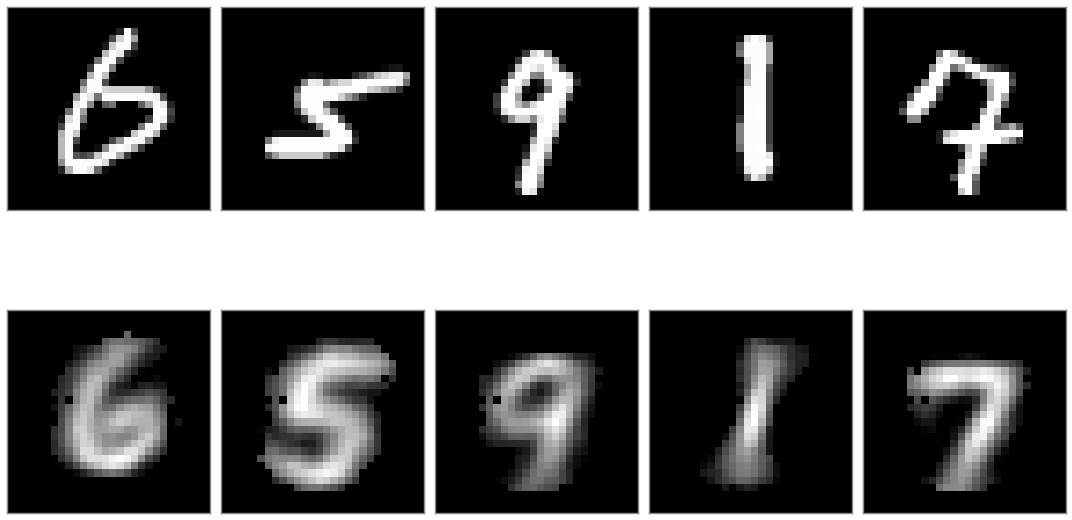

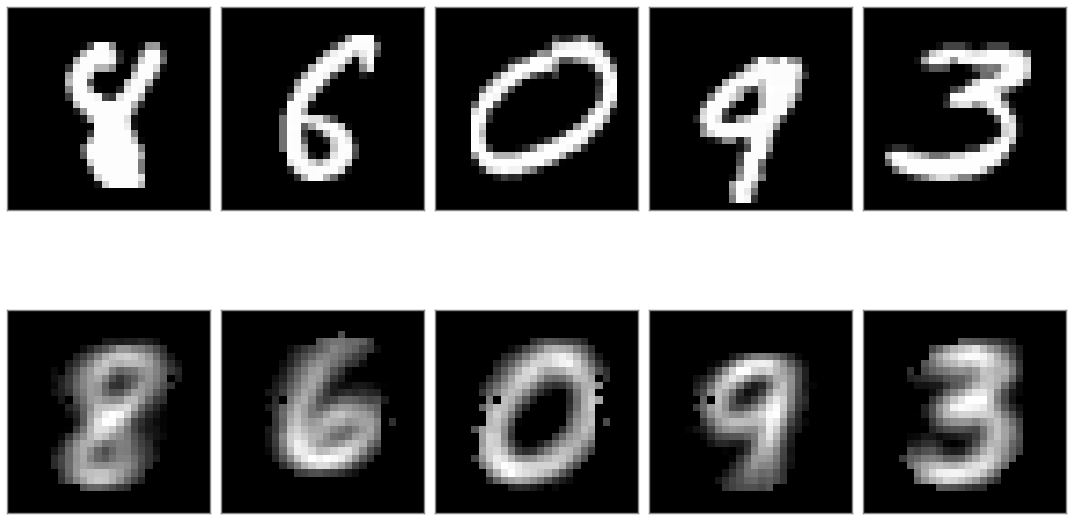

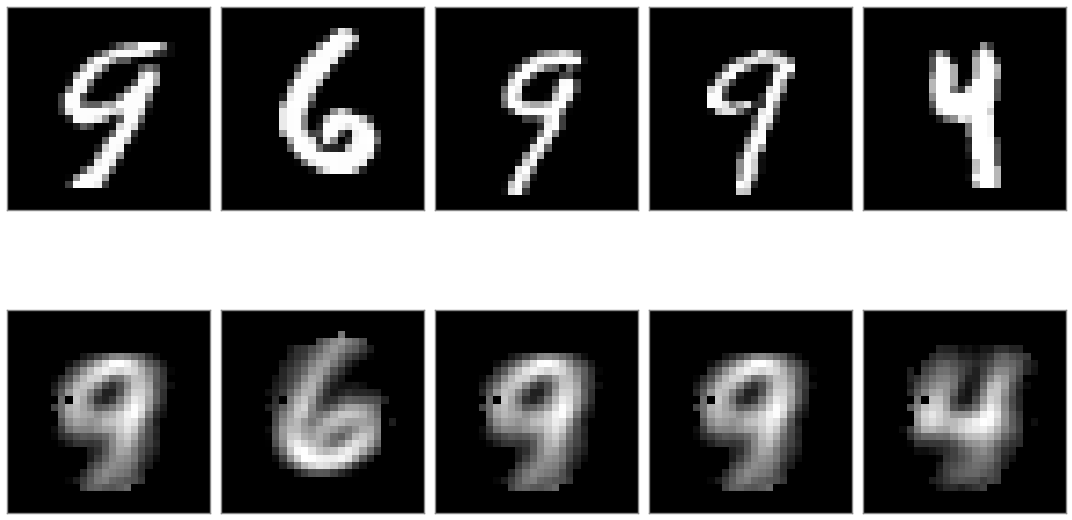

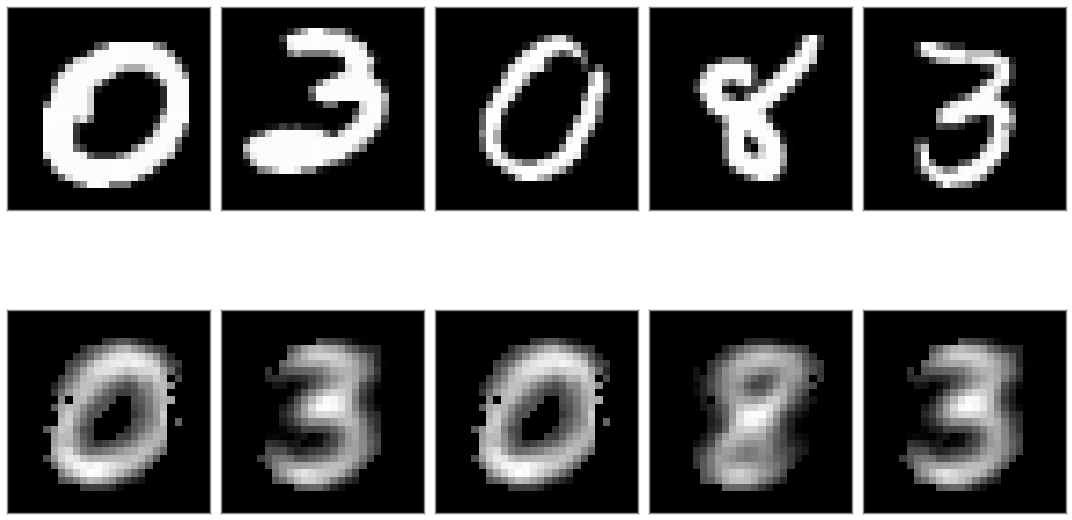

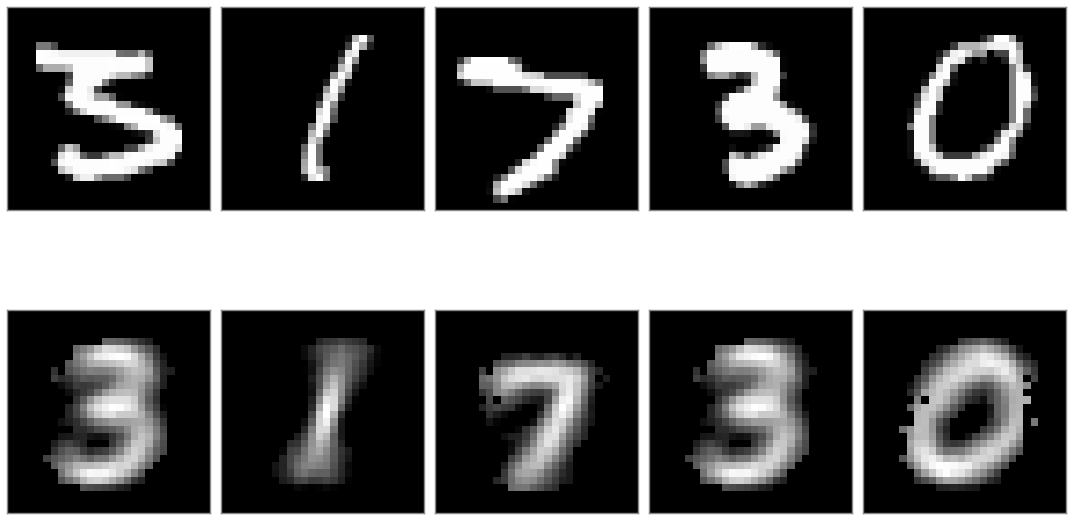

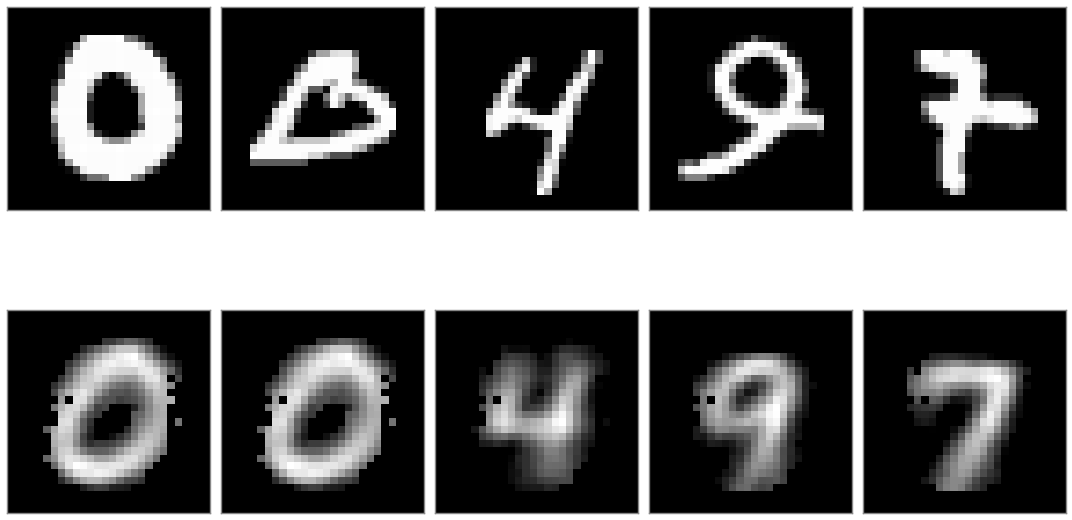

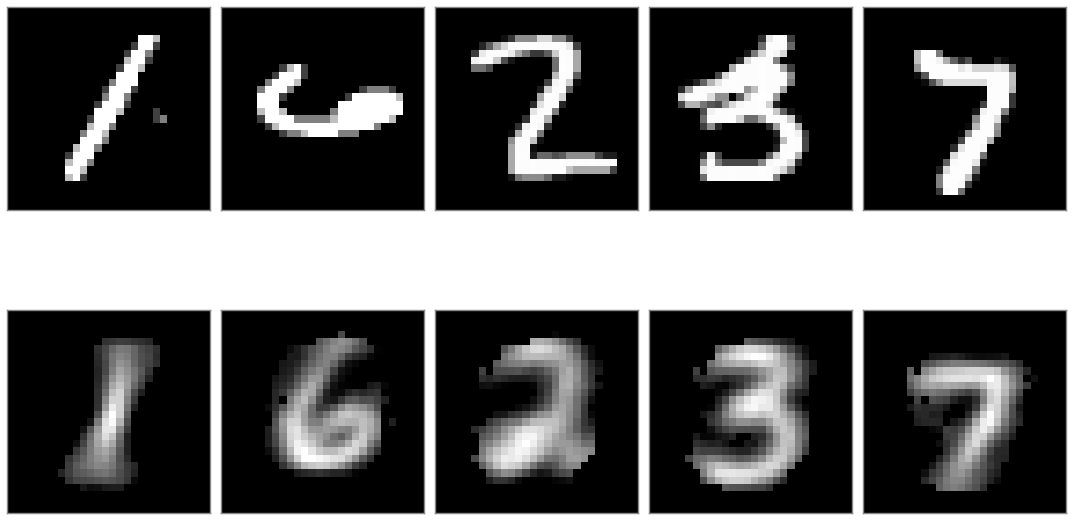

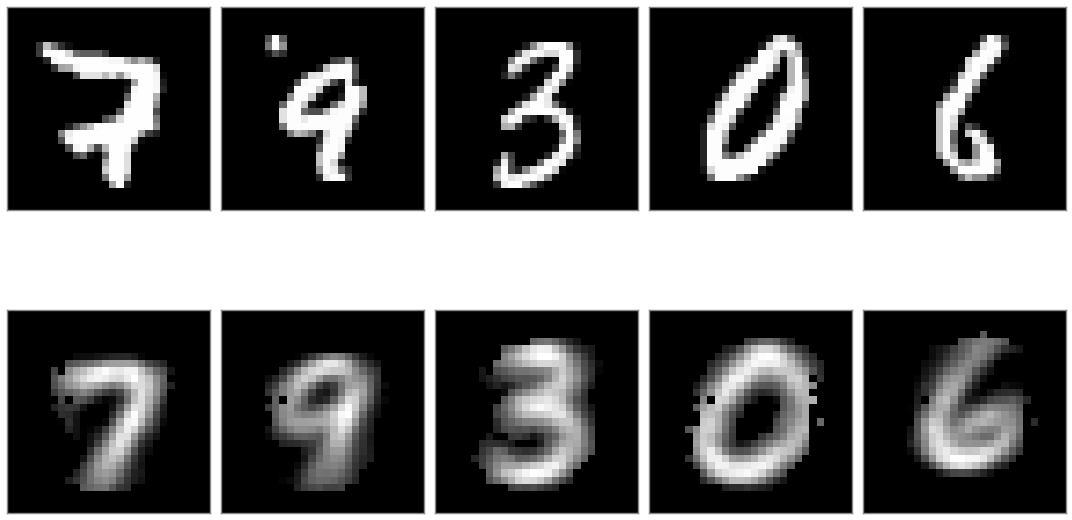

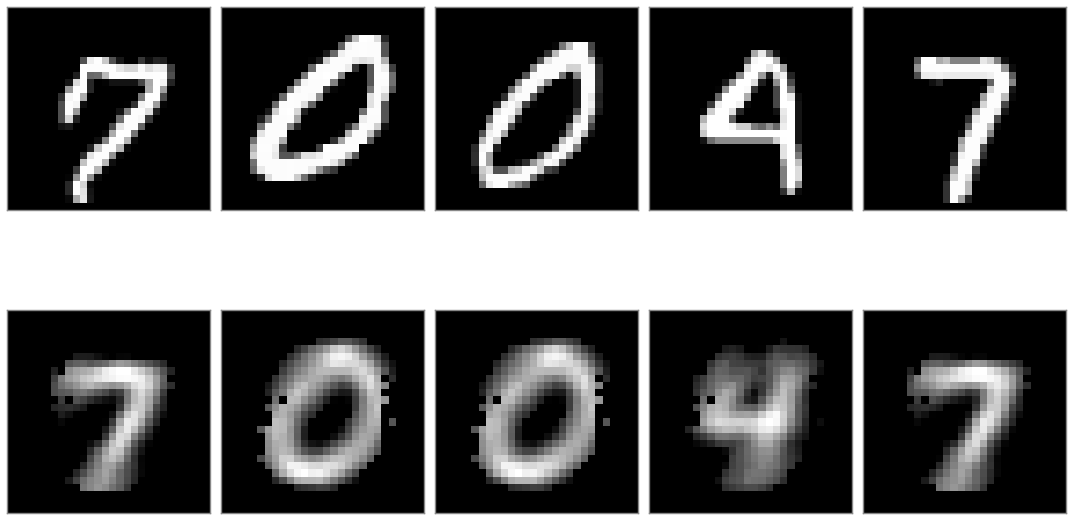

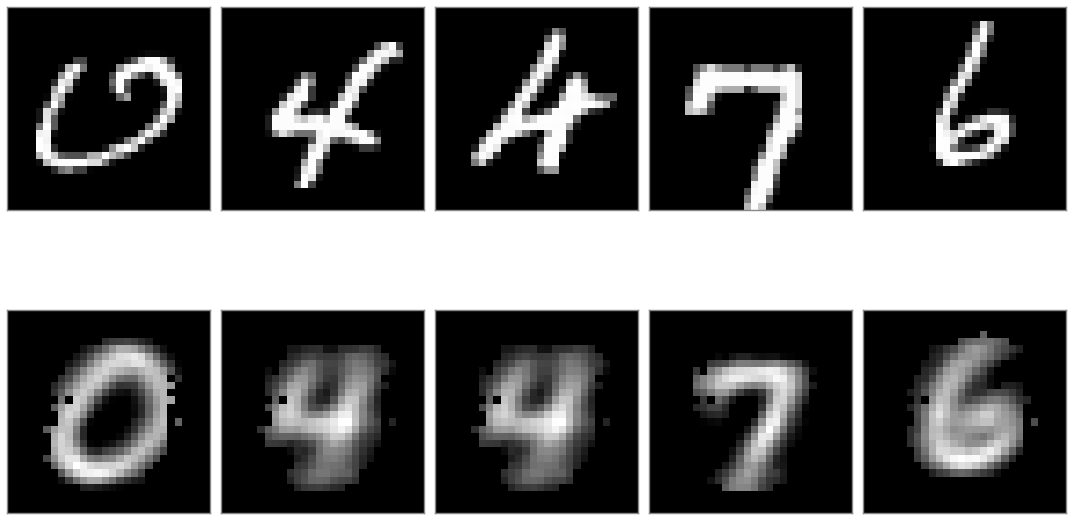

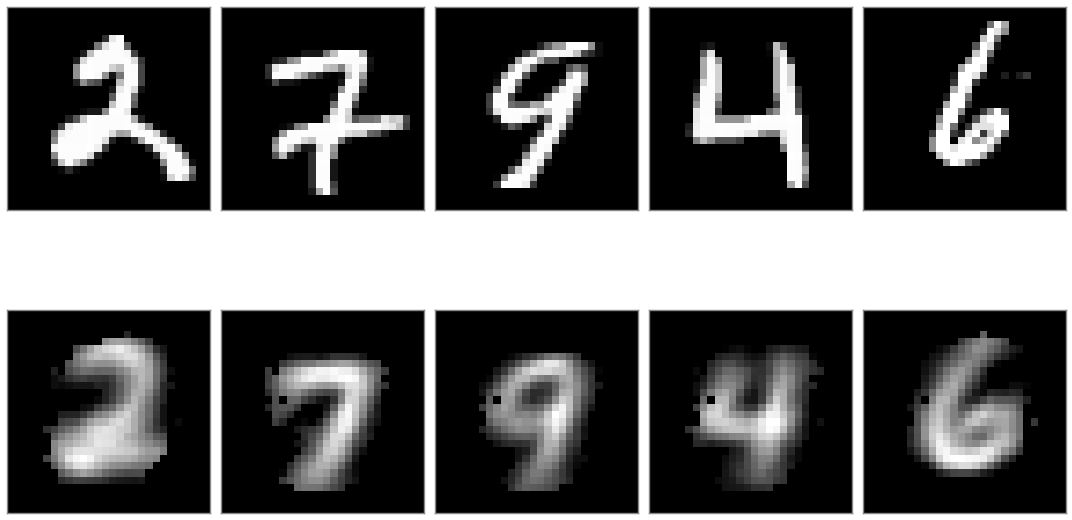

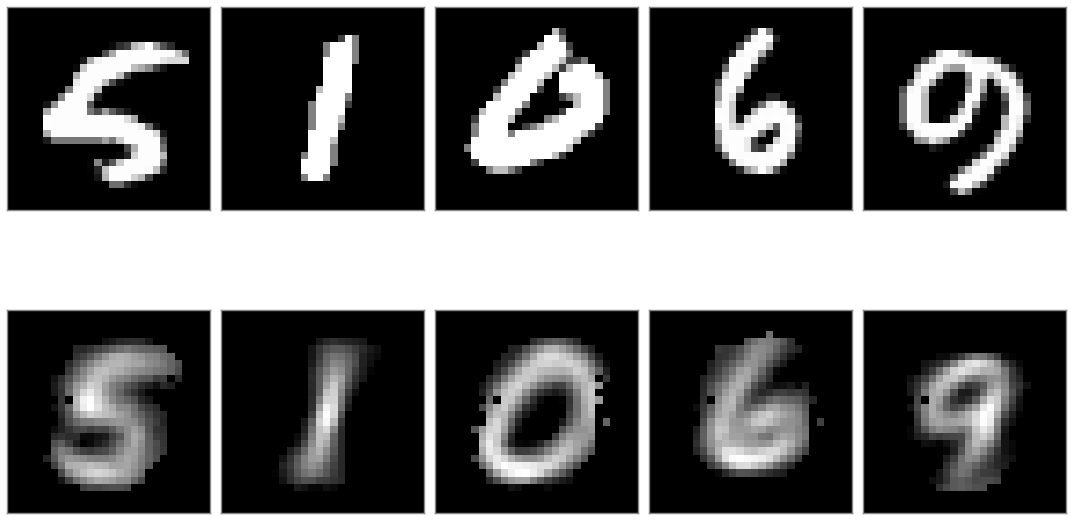

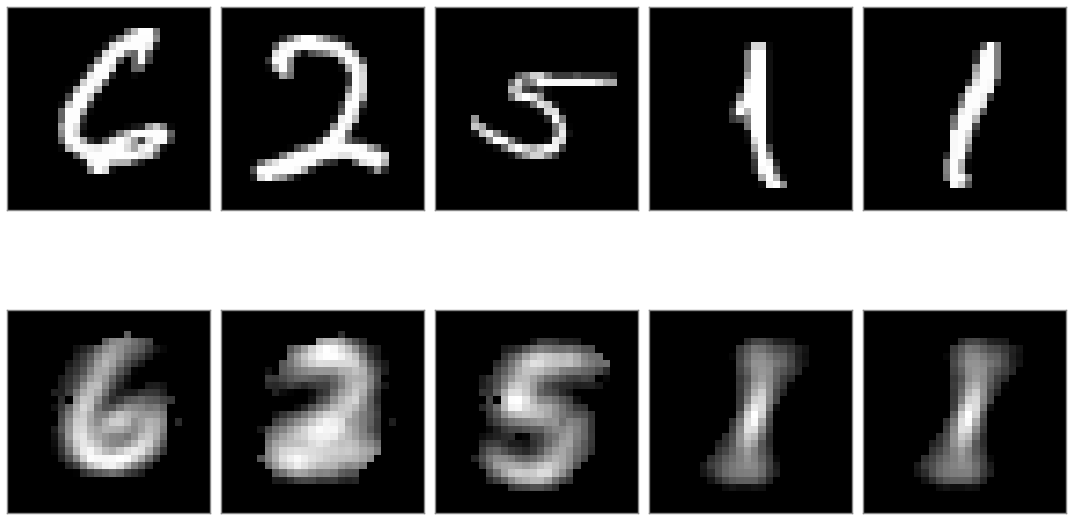

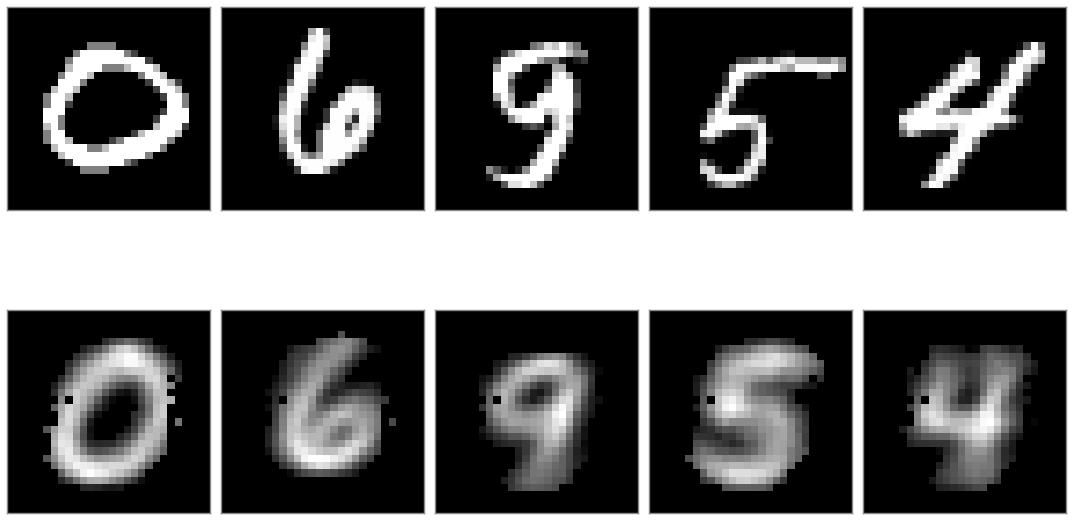

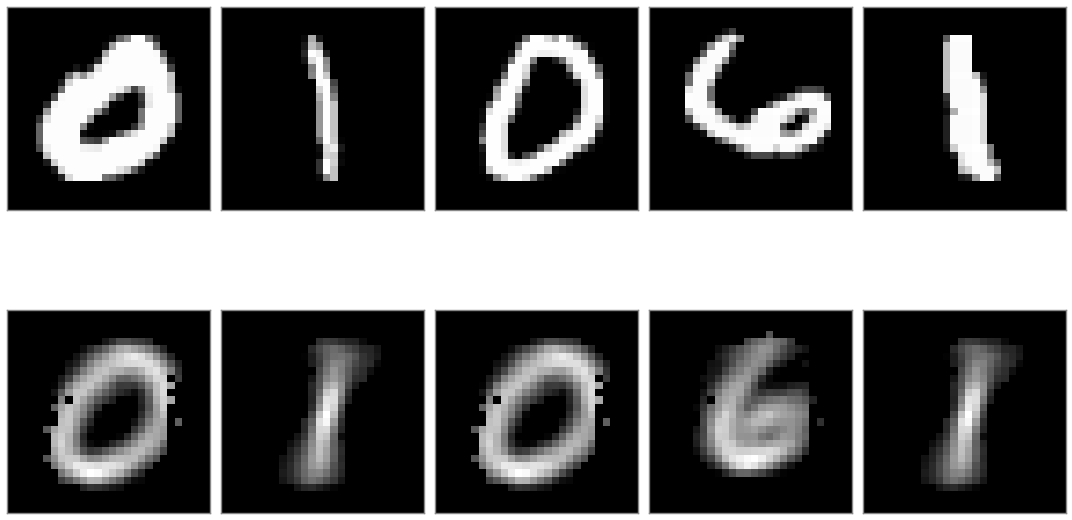

In [104]:
optimize(10000)

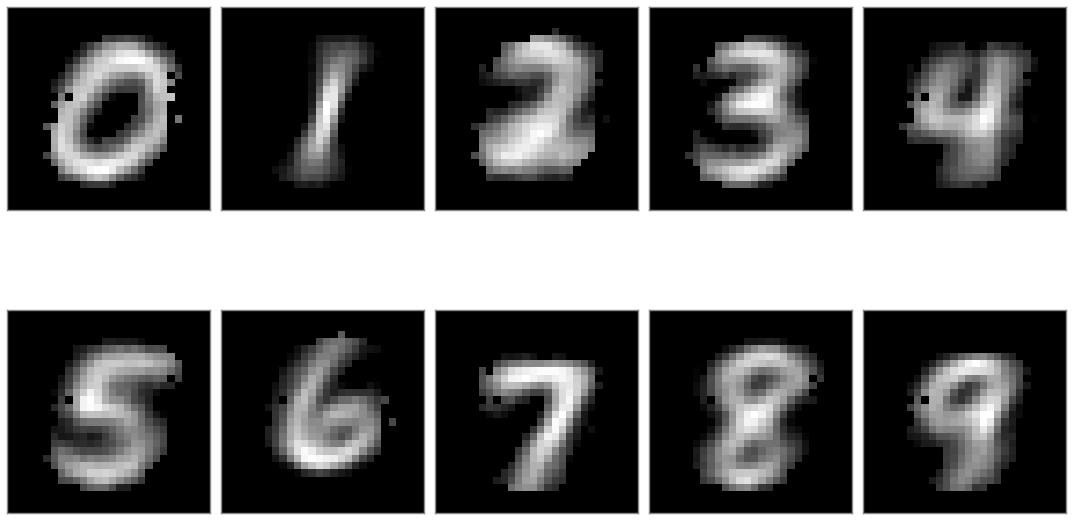

In [105]:
vectors = np.eye(10)
generated_images = session.run(y_pred, {x: vectors})
plot_images(generated_images[:5], generated_images[5:])

[[ 0.   0.   0.   0.   1.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.5  0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.5  0.5  0.   0.   0. ]
 [ 0.   0.   0.5  0.   0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.5  0.   0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.5  0.   0.5]
 [ 0.   0.   0.   0.   0.   0.   0.5  0.5  0.   0. ]
 [ 0.5  0.   0.   0.   0.   0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.5  0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   1.   0.   0.   0.   0. ]]


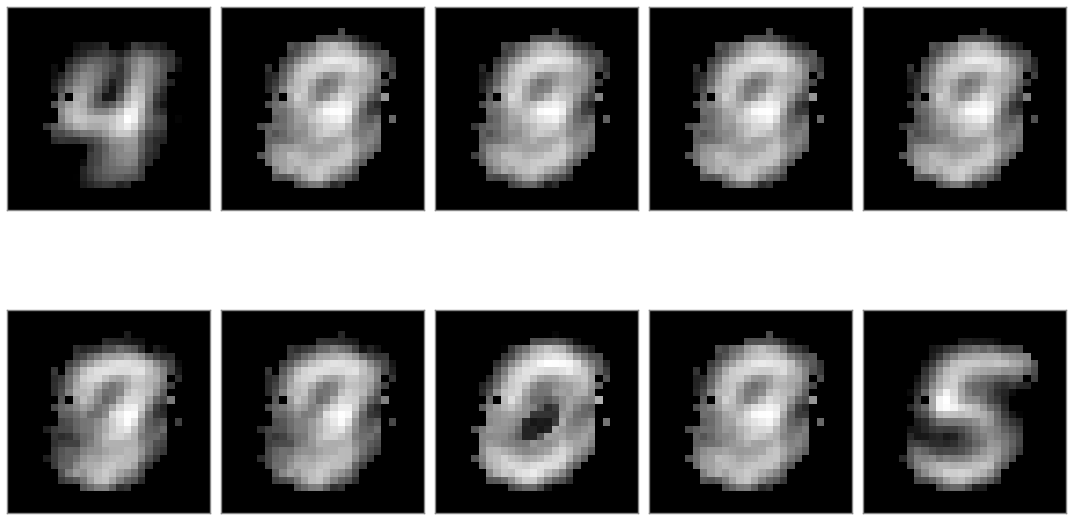

In [111]:
hybrid_vectors = np.zeros((10, 10))
hybrid_vectors[range(10), np.random.randint(0, 10, 10)] += 0.5
hybrid_vectors[range(10), np.random.randint(0, 10, 10)] += 0.5
hybrid_images = session.run(y_pred, {x: hybrid_vectors})
plot_images(hybrid_images[:5], hybrid_images[5:])
print(hybrid_vectors)

[[ 0.81 -0.98 -0.42  2.19 -1.17 -0.01  0.49  0.7   0.88  1.26]
 [-0.8  -0.98 -0.49 -1.58 -0.47  0.27  0.5   1.8  -0.07  1.2 ]
 [ 0.95  0.58 -0.35 -0.34 -0.22  0.7   1.16 -1.4   1.17 -0.28]
 [ 1.2  -0.28 -1.22  1.36 -0.7   0.96 -1.48  0.33 -0.58 -0.38]
 [-0.87 -2.04  1.88 -0.08 -1.38 -0.78  0.03  0.12  1.92 -0.38]
 [-0.53  0.61  0.04  1.45  0.61 -0.19 -0.02  0.   -0.34 -0.69]
 [-0.08 -0.78 -0.98  0.15  0.25  1.21  1.32 -0.7  -0.96  0.99]
 [ 0.24 -0.37  0.76  0.83 -0.46  0.43 -0.72 -1.64  0.44 -0.29]
 [-1.47 -0.15 -1.02  0.06  0.31  0.41  0.15  0.8  -1.1   1.39]
 [ 0.97 -0.91 -2.88 -1.48 -1.15 -0.21 -0.73  0.35  1.66  1.46]]


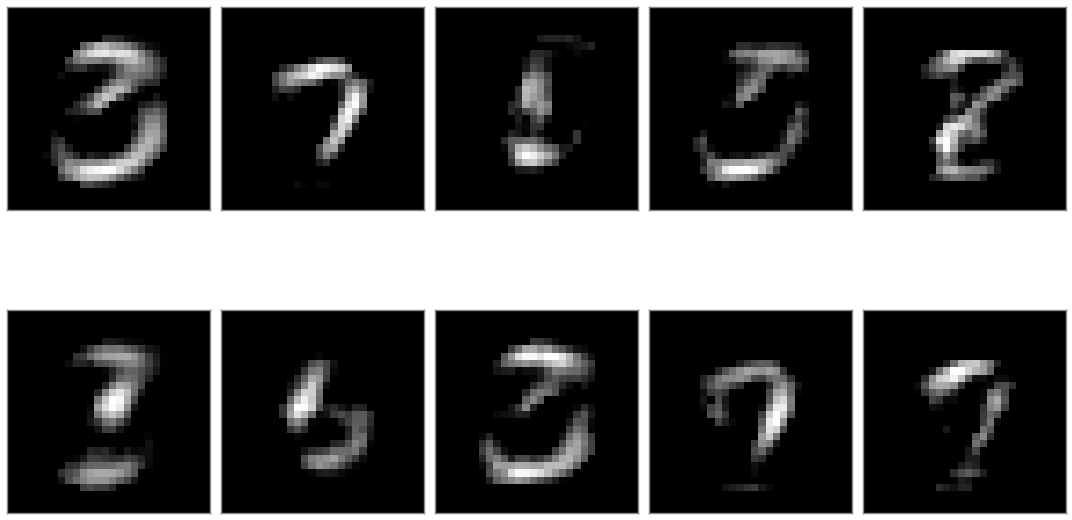

In [114]:
random_vectors = np.random.randn(10, 10)
random_images = session.run(y_pred, {x: random_vectors})
plot_images(random_images[:5], random_images[5:])
print(np.round(random_vectors, 2))

In [115]:
session.close()